# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [138]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("../data/absences.csv")
data

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9
5,5,6,58,7
6,6,7,29,14
7,7,8,36,11
8,8,9,64,5
9,9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

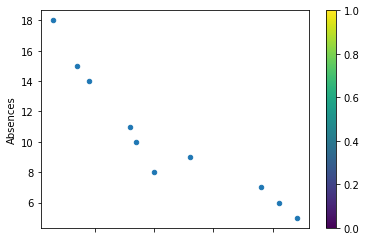

In [139]:
data.plot.scatter(x='Age', y='Absences',colormap='viridis')

In [140]:
"""Yes, we can observe a strong linear negative relation between the variables age and absences. 
That indicates that the highest the age of the employee, the least absences he makes."""

'Yes, we can observe a strong linear negative relation between the variables age and absences. \nThat indicates that the highest the age of the employee, the least absences he makes.'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [161]:
def substract_mean(df, X):
    x = list(df[X])
    x_mean = np.mean(x)
    return [elem - x_mean for elem in x]

In [166]:
def slope_intercept_calculator(df, X, Y):
    x = substract_mean(df, X) 
    y = substract_mean(df, Y)
    nominator = sum([i*j for i,j in zip(x,y)])
    denominator = sum([i**2 for i in x])
    slope = nominator/denominator
    
    intercept = df[Y].mean() - (slope * df[X].mean())
    
    return slope, intercept

m, b = slope_intercept_calculator(data, "Age", "Absences")

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [167]:
print("y = mx + b")
print ("y =", m, "x =", b)

y = mx + b
y = -0.2681088337033404 x = 21.58738189891063


In [220]:
#to check: 

X = data[["Age"]]
Y = data["Absences"]

regression = LinearRegression()
regression.fit(X,Y)
#or regression = LinearRegression().fit(X,Y)

m = regression.coef_
b = regression.intercept_

print("y = mx + b")
print ("y =", m, "x +", b)

#good, same result.

y = mx + b
y = [-0.26810883] x + 21.587381898910635


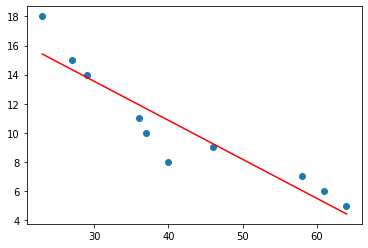

In [169]:
mn=np.min(X)
mx=np.max(X)
x1=np.linspace(mn,mx,500)
y1 = m*x1 + b
plt.scatter (X, Y)
plt.plot(x1,y1,'-r')

plt.show()

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [170]:
data

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9
5,5,6,58,7
6,6,7,29,14
7,7,8,36,11
8,8,9,64,5
9,9,10,40,8


In [180]:
def covar_calculation(df, X, Y):
    x = substract_mean(df, X) 
    y = substract_mean(df, Y)
    n = len(x)
    sumatorio = sum([i*j for i,j in zip(x,y)])
    return sumatorio / (n-1)
    
def correlation_coefficient(df, X, Y):
    s_x = df[X].std()
    s_y = df[Y].std()
    return covar_calculation(df, X, Y) / (s_x * s_y)

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [181]:
covar_calculation(data, "Age", "Absences")

-57.699999999999996

In [182]:
correlation_coefficient(data, "Age", "Absences")

-0.9325434092481012

In [121]:
""" the correlation confirms what we observed before: there is a strong negative correlation (-0.932)
between the variables Age and Absences. The CEO was right.
"""

' the correlation confirms what we observed before: there is a strong negative correlation (-0.839)\nbetween the variables Age and Absences. The CEO was right.\n'

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [122]:
"""
y = mx + b
y = [-0.26810883] x + 21.587381898910635

covariance(Age, Absence) = -57.7
correlation(Age, Absence) = -0.93 - strong negative correlation between age and absenteeism

In conclusion: Yes, it seams that the age is an indicator of absenteeism (the younger-> more likely to have high absenteeism.
"""

'\ny = mx + b\ny = [-0.26810883] x = 21.587381898910635\n\ncovariance(Age, Absence) = -51.92\ncorrelation(Age, Absence) = -0.83 - strong negative correlation between age and absenteeism\n\nIn conclusion: Yes, it seams that the age is an indicator of absenteeism (the younger-> more likely to have high absenteeism.\n'

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [223]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

In [224]:
covar_calculation(ironbeers_df, "X", "Y")

12.0

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [225]:
correlation_coefficient(ironbeers_df, "X", "Y")

0.9770084209183943

In [226]:
# Very strong positive correlation between the two variables: the more people is told to stay, the more they will.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

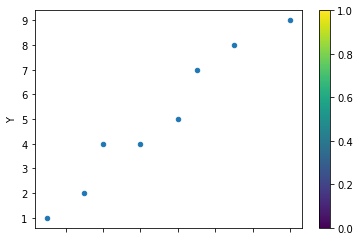

In [227]:
scatter = ironbeers_df.plot.scatter(x='X', y='Y', colormap='viridis')

In [228]:
# your comments here

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [229]:
m, b = slope_intercept_calculator(ironbeers_df, "X", "Y")
print("y = mx + b")
print ("y =", m, "x +", b)

y = mx + b
y = 0.6363636363636364 x + 0.5454545454545459


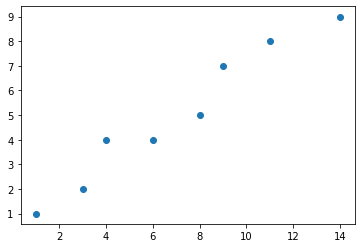

In [232]:
plt.scatter(ironbeers_df['X'], ironbeers_df['Y'])

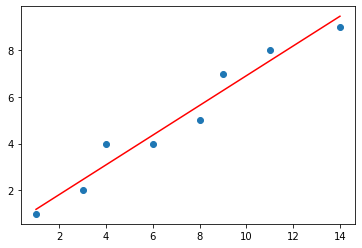

In [244]:
x = list(ironbeers_df['X'])
y = [m * j + b for j in x]

plt.scatter(ironbeers_df['X'], ironbeers_df['Y'])
plt.plot(x,y,'-r')
plt.show()

In [246]:
# if you tell one more person to stay, one person and one leg stays 

y = 0.6363636363636364 * 1 + 0.5454545454545459
y

1.181818181818182

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# No, I am actually the reason why they stay

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here